In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
sns.color_palette(["#4a4a4a", "#00798c", "#d1495b", '#edae49', '#66a182', '#ffe2b3', '#ccffe4'])

[(0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (1.0, 0.8862745098039215, 0.7019607843137254),
 (0.8, 1.0, 0.8941176470588236)]

# 1. alpha diversity

In [8]:
data = pd.read_csv('../20230718_Results/Table S3Add. alpha_diversity.csv', index_col=0)
data.head(2)

,Project,Unmatched_cohen's d,Unmatched_p(mannwhitneyu),Matched_cohen's d,Matched_p(wilcoxon),Unmatched_observed_otus_mean(Trial=0),Unmatched_observed_otus_mean(Trial=1),Unmatched_observed_otus_cohen's d,Unmatched_observed_otus_p(mannwhitneyu),Matched_observed_otus_mean(Trial=0),...,Matched_shannon_cohen's d,Matched_shannon_p(wilcoxon),Unmatched_simpson_mean(Trial=0),Unmatched_simpson_mean(Trial=1),Unmatched_simpson_cohen's d,Unmatched_simpson_p(mannwhitneyu),Matched_simpson_mean(Trial=0),Matched_simpson_mean(Trial=1),Matched_simpson_cohen's d,Matched_simpson_p(wilcoxon)
0,08,1.866350,0.000635,0.018763,1.417541e-09,14.6000,14.215881,0.057546,0.491614,17.810976,...,2.003445,1.170280e-26,0.687681,0.571050,0.570387,0.101922,0.778080,0.528259,1.721274,2.926846e-26
1,09,1.119685,0.001207,0.047927,5.391893e-01,85.8125,72.625000,0.409530,0.145536,90.571429,...,0.615540,5.019188e-02,0.862741,0.824826,0.332026,0.149997,0.869871,0.809918,0.484837,1.469641e-01


(2.0115884707579066, 2.7440028702991284)

0.9469210340662924

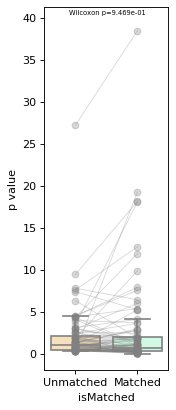

(0.40934019692584633, 0.5156669930882727)

0.4488841993769602

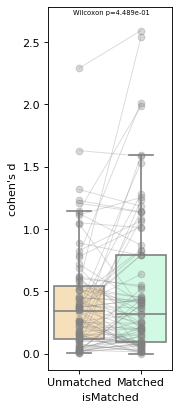

In [46]:
plotdata = []
#['observed_otus', 'chao1', 'shannon', 'simpson']
metric = 'chao1'
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', -np.log10(data.loc[i, 'Unmatched_'+metric+'_p(mannwhitneyu)'])])
    plotdata.append([data.loc[i, 'Project'], 'Matched', -np.log10(data.loc[i, 'Matched_'+metric+'_p(wilcoxon)'])])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'p value'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="p value", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [-np.log10(data.loc[i, 'Unmatched_'+metric+'_p(mannwhitneyu)']), -np.log10(data.loc[i, 'Matched_'+metric+'_p(wilcoxon)'])], 
                 '-o', alpha=0.3, color='gray', lw=0.8)

(-np.log10(data['Unmatched_'+metric+'_p(mannwhitneyu)'])).mean(), (-np.log10(data['Matched_'+metric+'_p(wilcoxon)'])).mean()

p = stats.wilcoxon(-np.log10(data['Unmatched_'+metric+'_p(mannwhitneyu)']), -np.log10(data['Matched_'+metric+'_p(wilcoxon)']), 
                   alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3E. '+metric+'_pvalue.pdf', dpi=300)
_ = plt.show()

plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, 'Unmatched_'+metric+"_cohen's d"]])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, 'Matched_'+metric+"_cohen's d"]])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', "cohen's d"])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="cohen's d", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, 'Unmatched_'+metric+"_cohen's d"], data.loc[i, 'Matched_'+metric+"_cohen's d"]], 
                 '-o', alpha=0.3, color='gray', lw=0.8)

data['Unmatched_'+metric+"_cohen's d"].mean(), data['Matched_'+metric+"_cohen's d"].mean()

p = stats.wilcoxon(data['Unmatched_'+metric+"_cohen's d"], data['Matched_'+metric+"_cohen's d"], 
                   alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3E. '+metric+"_cohen's d.pdf", dpi=300)
_ = plt.show()

# 2. alpha diversity vs. PS change

('相关统计',
 SpearmanrResult(correlation=0.35014045067495575, pvalue=0.0008252873324986989))

(0.42074078021074013,
 0.0135072745274456,
 0.6678587593513527,
 1.8387282086834337e-06)

(0.07788490768746886,
 0.0943605427932493,
 0.19584497917698782,
 0.18706575983674983)

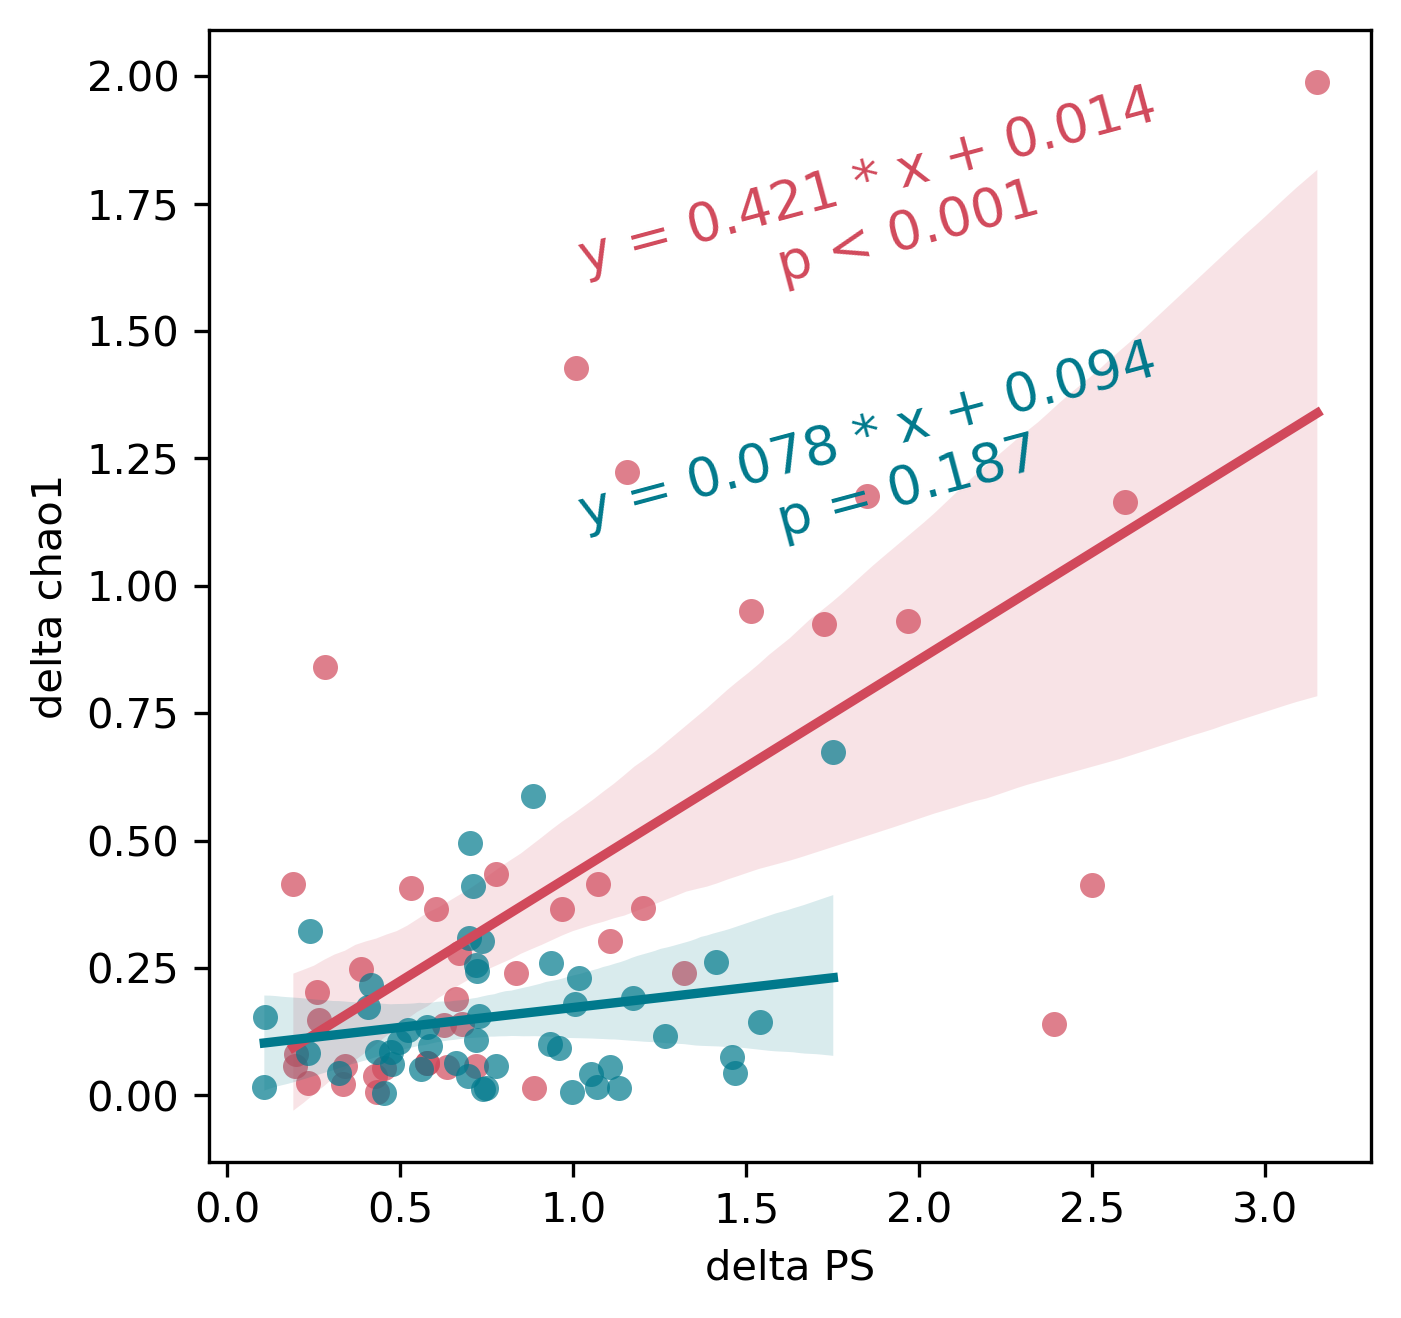

In [73]:
'相关统计', stats.spearmanr(np.abs(data["Matched_chao1_cohen's d"]-data["Unmatched_chao1_cohen's d"]), 
                       np.abs(data["Matched_cohen's d"]-data["Unmatched_cohen's d"]))

data['delta PS'] = np.abs(data["Matched_cohen's d"]-data["Unmatched_cohen's d"])
data['delta chao1'] = np.abs(data["Matched_chao1_cohen's d"]-data["Unmatched_chao1_cohen's d"])
data['sign_chao1'] = np.sign(data["Matched_chao1_cohen's d"]-data["Unmatched_chao1_cohen's d"])
colors = ['#d1495b' if i>0 else '#00798c' for i in data['sign_chao1']]

fig = plt.figure(0, (5, 5), dpi=300)
#p = sns.regplot(x="delta PS", y="delta chao1", data=data, color='#00798c', scatter_kws={'linewidths':0, 'color':colors})
p1 = sns.regplot(x="delta PS", y="delta chao1", data=data.loc[data['sign_chao1']>0, :], color='#d1495b', scatter_kws={'linewidths':0, 'alpha':0.7})
p2 = sns.regplot(x="delta PS", y="delta chao1", data=data.loc[data['sign_chao1']<0, :], color='#00798c', scatter_kws={'linewidths':0, 'alpha':0.7})

slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.loc[data['sign_chao1']>0, "delta PS"], y=data.loc[data['sign_chao1']>0, "delta chao1"])
slope,intercept,r_value,p_value
_ = plt.annotate('y = '+str(round(slope, 3))+' * x + '+str(round(intercept, 3))+'\n           p < 0.001', 
                 (1.0, 1.5), fontsize=13, rotation=15, color='#d1495b')

slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.loc[data['sign_chao1']<0, "delta PS"], y=data.loc[data['sign_chao1']<0, "delta chao1"])
slope,intercept,r_value,p_value
_ = plt.annotate('y = '+str(round(slope, 3))+' * x + '+str(round(intercept, 3))+'\n           p = 0.187', 
                 (1.0, 1), fontsize=13, rotation=15, color='#00798c')

_ = plt.savefig('../20230718_Results/Figure 3G. alpha diversity vs. PS change.pdf', dpi=300)
_ = plt.show()

In [75]:
data.sort_values(['delta chao1']).tail(5)

,Project,Unmatched_cohen's d,Unmatched_p(mannwhitneyu),Matched_cohen's d,Matched_p(wilcoxon),Unmatched_observed_otus_mean(Trial=0),Unmatched_observed_otus_mean(Trial=1),Unmatched_observed_otus_cohen's d,Unmatched_observed_otus_p(mannwhitneyu),Matched_observed_otus_mean(Trial=0),...,Unmatched_simpson_mean(Trial=1),Unmatched_simpson_cohen's d,Unmatched_simpson_p(mannwhitneyu),Matched_simpson_mean(Trial=0),Matched_simpson_mean(Trial=1),Matched_simpson_cohen's d,Matched_simpson_p(wilcoxon),delta PS,delta chao1,sign_chao1
20,37_2,2.594704,0.000614,0.001418,1.000000e+00,70.644351,78.454545,0.368167,0.037469,74.875000,...,0.687738,1.145395,0.062368,0.915355,0.938288,0.740225,1.484375e-01,2.593286,1.163861,1.0
0,08,1.866350,0.000635,0.018763,1.417541e-09,14.600000,14.215881,0.057546,0.491614,17.810976,...,0.571050,0.570387,0.101922,0.778080,0.528259,1.721274,2.926846e-26,1.847587,1.175370,1.0
62,84_14,1.165387,0.013120,0.008846,8.437500e-01,45.368078,31.000000,0.791396,0.091198,50.666667,...,0.792079,0.238489,0.425033,0.697136,0.792079,0.469166,8.437500e-01,1.156541,1.222831,1.0
69,84_8,1.018088,0.006771,0.010015,1.000000e+00,45.368078,48.333333,0.163461,0.348388,31.666667,...,0.784073,0.193527,0.464427,0.408603,0.784073,1.879579,2.500000e-01,1.008073,1.426849,1.0
64,84_17,3.151675,0.032226,0.001548,1.000000e+00,45.368078,35.333333,0.552409,0.193853,68.000000,...,0.755955,0.035319,0.248189,0.922625,0.755349,3.655798,5.000000e-01,3.150127,1.987516,1.0


# 3. Beta diversity

In [76]:
data = pd.read_csv('../20230718_Results/Table S3Add. beta_diversity.csv', index_col=0)
data.head(2)

,Project,Unmatched_cohen's d,Unmatched_p(mannwhitneyu),Matched_cohen's d,Matched_p(wilcoxon),Unmatched_p(ANOSIM),Matched_p(ANOSIM),Unmatched_p(PERMANOVA),Matched_p(PERMANOVA)
0,08,1.866350,0.000635,0.018763,1.417541e-09,0.027,0.037,0.001,0.003
1,09,1.119685,0.001207,0.047927,5.391893e-01,0.001,0.039,0.001,0.031


(1.5330945825019595, 1.2881463729491236)

0.007496635464505073

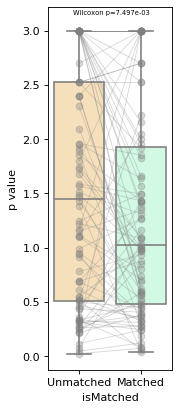

(2.1806193578802486, 1.7158709436802377)

5.011150116245053e-10

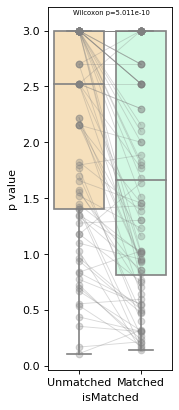

In [79]:
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', -np.log10(data.loc[i, 'Unmatched_p(ANOSIM)'])])
    plotdata.append([data.loc[i, 'Project'], 'Matched', -np.log10(data.loc[i, 'Matched_p(ANOSIM)'])])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'p value'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="p value", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [-np.log10(data.loc[i, 'Unmatched_p(ANOSIM)']), -np.log10(data.loc[i, 'Matched_p(ANOSIM)'])], 
                 '-o', alpha=0.3, color='gray', lw=0.8)

(-np.log10(data['Unmatched_p(ANOSIM)'])).mean(), (-np.log10(data['Matched_p(ANOSIM)'])).mean()

p = stats.wilcoxon(-np.log10(data['Unmatched_p(ANOSIM)']), -np.log10(data['Matched_p(ANOSIM)']), 
                   alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3H. beta_diversity_pvalue(ANOSIM).pdf', dpi=300)
_ = plt.show()

plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', -np.log10(data.loc[i, 'Unmatched_p(PERMANOVA)'])])
    plotdata.append([data.loc[i, 'Project'], 'Matched', -np.log10(data.loc[i, 'Matched_p(PERMANOVA)'])])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'p value'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="p value", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [-np.log10(data.loc[i, 'Unmatched_p(PERMANOVA)']), -np.log10(data.loc[i, 'Matched_p(PERMANOVA)'])], 
                 '-o', alpha=0.3, color='gray', lw=0.8)

(-np.log10(data['Unmatched_p(PERMANOVA)'])).mean(), (-np.log10(data['Matched_p(PERMANOVA)'])).mean()

p = stats.wilcoxon(-np.log10(data['Unmatched_p(PERMANOVA)']), -np.log10(data['Matched_p(PERMANOVA)']), 
                   alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3H. beta_diversity_pvalue(PERMANOVA).pdf', dpi=300)
_ = plt.show()


('相关统计',
 SpearmanrResult(correlation=0.1101827500457731, pvalue=0.30680807596803183))

(0.5091091305123161,
 0.1617714979392083,
 0.4226805809059431,
 0.019964834993018016)

(0.261969678648542, 0.550228989214428, 0.2309374187379703, 0.10662139513627236)

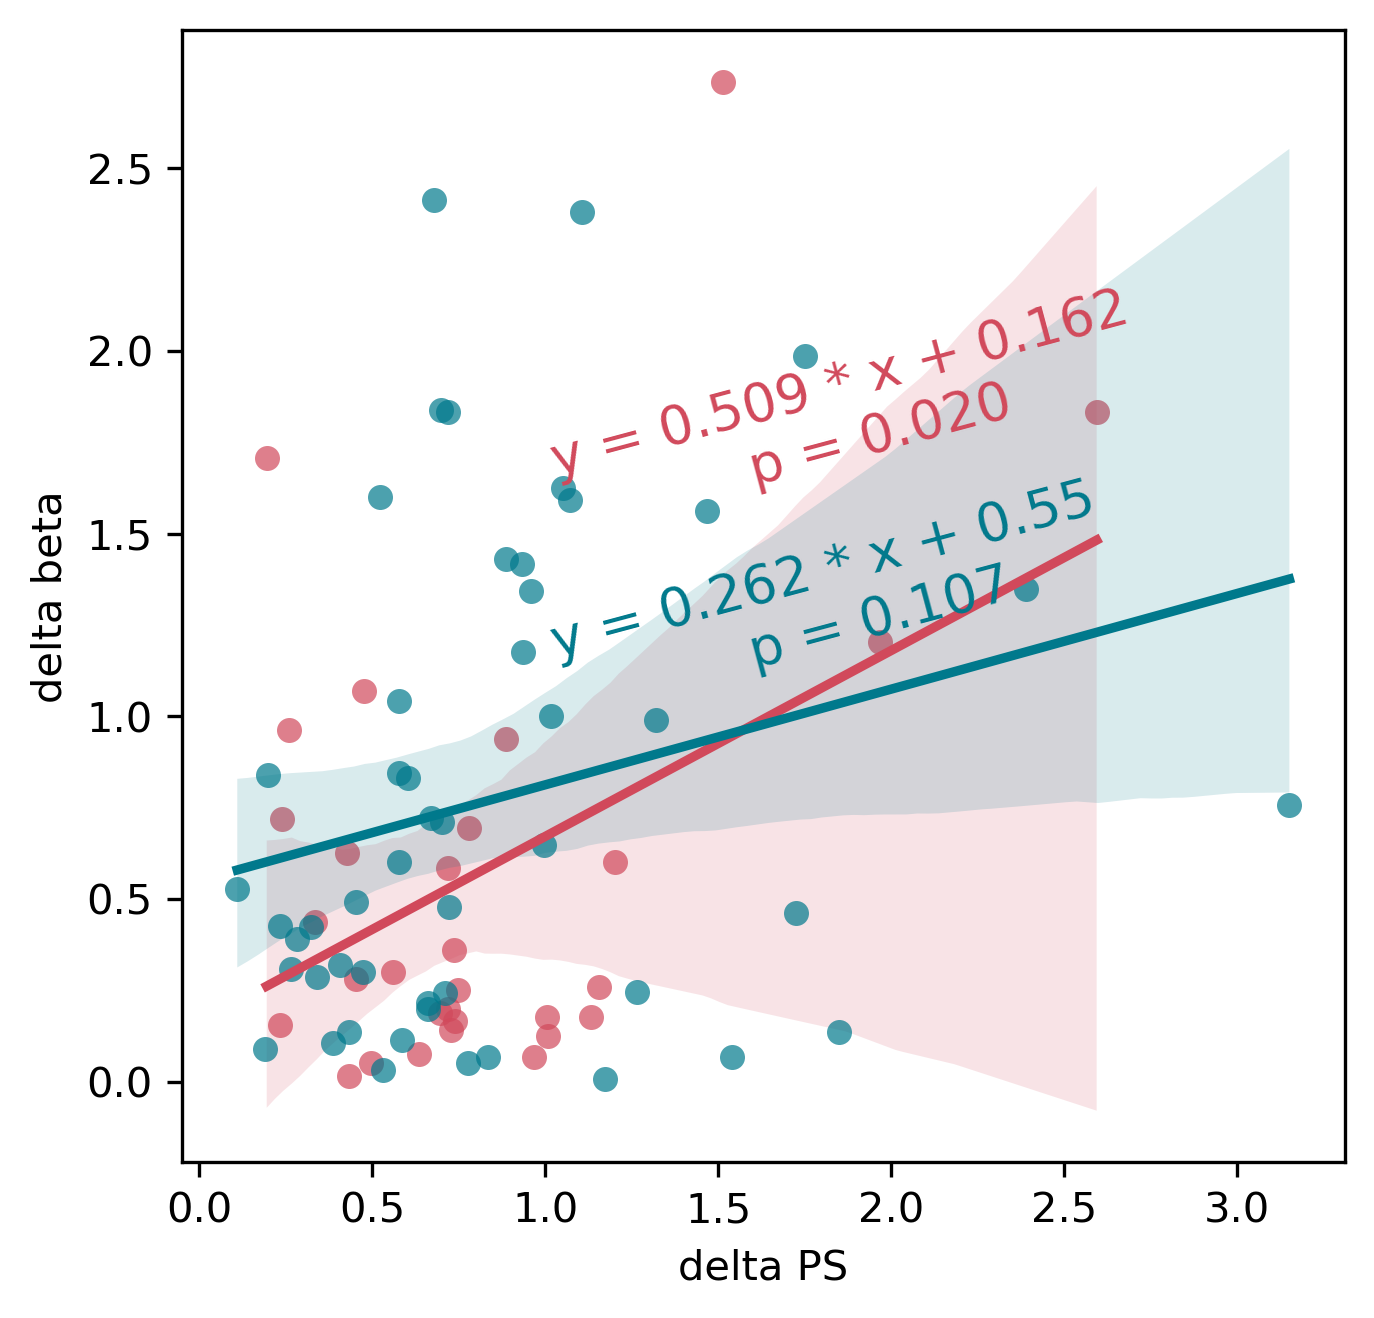

In [97]:
'相关统计', stats.spearmanr(np.abs(np.log10(data['Unmatched_p(ANOSIM)'])-np.log10(data['Matched_p(ANOSIM)'])), 
                       np.abs(data["Matched_cohen's d"]-data["Unmatched_cohen's d"]))

data['delta PS'] = np.abs(data["Matched_cohen's d"]-data["Unmatched_cohen's d"])
data['delta beta'] = np.abs(np.log10(data['Unmatched_p(ANOSIM)'])-np.log10(data['Matched_p(ANOSIM)']))
data['sign beta'] = np.sign(np.log10(data['Unmatched_p(ANOSIM)'])-np.log10(data['Matched_p(ANOSIM)']))
colors = ['#d1495b' if i>0 else '#00798c' for i in data['sign beta']]

fig = plt.figure(0, (5, 5), dpi=300)
#p = sns.regplot(x="delta PS", y="delta chao1", data=data, color='#00798c', scatter_kws={'linewidths':0, 'color':colors})
p1 = sns.regplot(x="delta PS", y="delta beta", data=data.loc[data['sign beta']>0, :], color='#d1495b', scatter_kws={'linewidths':0, 'alpha':0.7})
p2 = sns.regplot(x="delta PS", y="delta beta", data=data.loc[data['sign beta']<0, :], color='#00798c', scatter_kws={'linewidths':0, 'alpha':0.7})

slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.loc[data['sign beta']>0, "delta PS"], y=data.loc[data['sign beta']>0, "delta beta"])
slope,intercept,r_value,p_value
_ = plt.annotate('y = '+str(round(slope, 3))+' * x + '+str(round(intercept, 3))+'\n           p = 0.020', 
                 (1.0, 1.5), fontsize=13, rotation=15, color='#d1495b')

slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.loc[data['sign beta']<0, "delta PS"], y=data.loc[data['sign beta']<0, "delta beta"])
slope,intercept,r_value,p_value
_ = plt.annotate('y = '+str(round(slope, 3))+' * x + '+str(round(intercept, 3))+'\n           p = 0.107', 
                 (1.0, 1), fontsize=13, rotation=15, color='#00798c')

_ = plt.savefig('../20230718_Results/Figure 3J. beta diversity(ANOSIM) vs. PS change.pdf', dpi=300)
_ = plt.show()

In [98]:
data.sort_values(['delta beta']).tail(5)

,Project,Unmatched_cohen's d,Unmatched_p(mannwhitneyu),Matched_cohen's d,Matched_p(wilcoxon),Unmatched_p(ANOSIM),Matched_p(ANOSIM),Unmatched_p(PERMANOVA),Matched_p(PERMANOVA),delta PS,delta beta,sign beta
48,71,0.704156,1.614310e-03,0.004500,0.707592,0.004,0.276,0.003,0.017,0.699657,1.838849,-1.0
12,26,1.759998,4.420547e-07,0.008573,0.741069,0.001,0.097,0.001,0.001,1.751426,1.986772,-1.0
27,43,1.109187,8.385228e-03,0.003927,1.000000,0.001,0.240,0.001,0.139,1.105260,2.380211,-1.0
86,99_2,0.683632,1.723595e-04,0.003671,0.650835,0.001,0.258,0.001,0.002,0.679961,2.411620,-1.0
30,48_2,1.516536,6.250785e-11,0.001935,0.935224,0.544,0.001,0.001,0.001,1.514601,2.735599,1.0


('相关统计',
 SpearmanrResult(correlation=0.1385129871133394, pvalue=0.19809357361038843))

(0.04199216431929847,
 0.15480827126918695,
 0.1599047696861899,
 0.6590159459904545)

(0.32451865244761, 0.4980309401696862, 0.350652880217977, 0.008672696259687137)

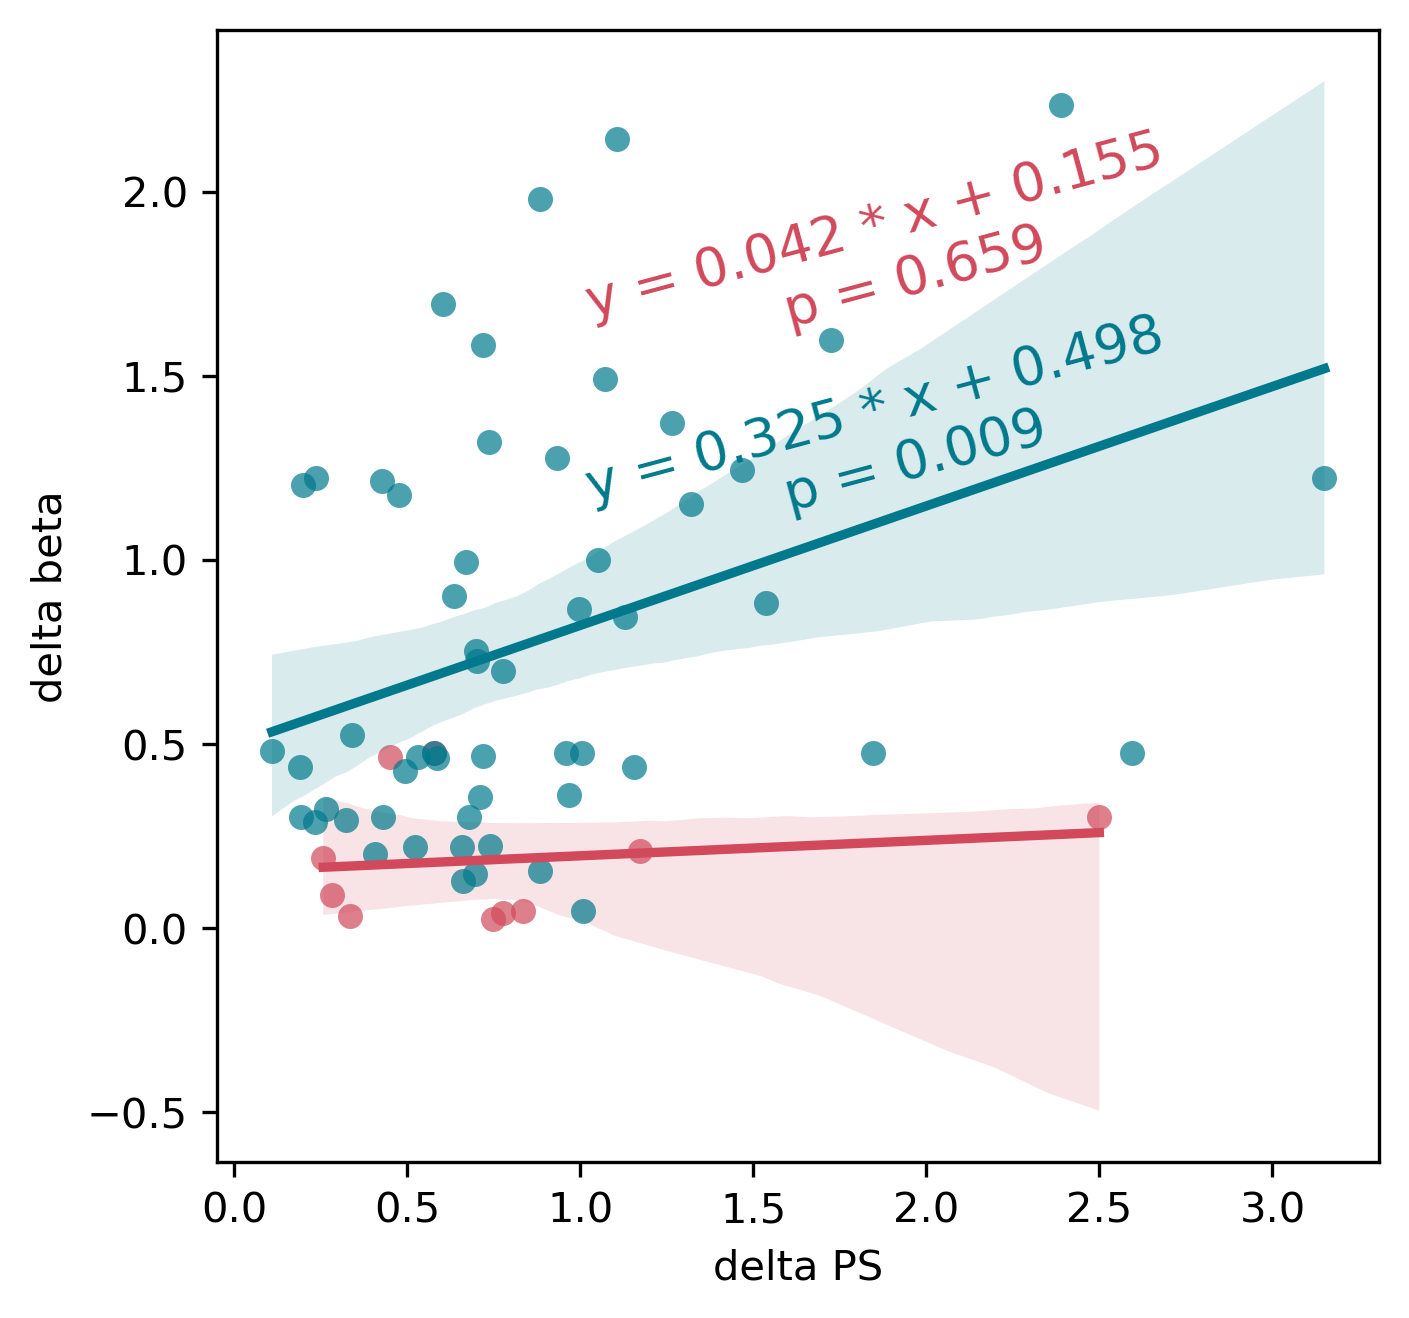

In [95]:
'相关统计', stats.spearmanr(np.abs(np.log10(data['Unmatched_p(PERMANOVA)'])-np.log10(data['Matched_p(PERMANOVA)'])), 
                       np.abs(data["Matched_cohen's d"]-data["Unmatched_cohen's d"]))

data['delta PS'] = np.abs(data["Matched_cohen's d"]-data["Unmatched_cohen's d"])
data['delta beta'] = np.abs(np.log10(data['Unmatched_p(PERMANOVA)'])-np.log10(data['Matched_p(PERMANOVA)']))
data['sign beta'] = np.sign(np.log10(data['Unmatched_p(PERMANOVA)'])-np.log10(data['Matched_p(PERMANOVA)']))
colors = ['#d1495b' if i>0 else '#00798c' for i in data['sign beta']]

fig = plt.figure(0, (5, 5), dpi=300)
#p = sns.regplot(x="delta PS", y="delta chao1", data=data, color='#00798c', scatter_kws={'linewidths':0, 'color':colors})
p1 = sns.regplot(x="delta PS", y="delta beta", data=data.loc[data['sign beta']>0, :], color='#d1495b', scatter_kws={'linewidths':0, 'alpha':0.7})
p2 = sns.regplot(x="delta PS", y="delta beta", data=data.loc[data['sign beta']<0, :], color='#00798c', scatter_kws={'linewidths':0, 'alpha':0.7})

slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.loc[data['sign beta']>0, "delta PS"], y=data.loc[data['sign beta']>0, "delta beta"])
slope,intercept,r_value,p_value
_ = plt.annotate('y = '+str(round(slope, 3))+' * x + '+str(round(intercept, 3))+'\n           p = 0.659', 
                 (1.0, 1.5), fontsize=13, rotation=15, color='#d1495b')

slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.loc[data['sign beta']<0, "delta PS"], y=data.loc[data['sign beta']<0, "delta beta"])
slope,intercept,r_value,p_value
_ = plt.annotate('y = '+str(round(slope, 3))+' * x + '+str(round(intercept, 3))+'\n           p = 0.009', 
                 (1.0, 1), fontsize=13, rotation=15, color='#00798c')

_ = plt.savefig('../20230718_Results/Figure 3J. beta diversity(PERMANOVA) vs. PS change.pdf', dpi=300)
_ = plt.show()

In [96]:
data.sort_values(['delta beta']).tail(5)

,Project,Unmatched_cohen's d,Unmatched_p(mannwhitneyu),Matched_cohen's d,Matched_p(wilcoxon),Unmatched_p(ANOSIM),Matched_p(ANOSIM),Unmatched_p(PERMANOVA),Matched_p(PERMANOVA),delta PS,delta beta,sign beta
38,50_1,1.738769,0.003198,0.014230,0.742188,0.304,0.879,0.003,0.119,1.724539,1.598426,-1.0
74,92_1,0.605873,0.018374,0.002080,0.529681,0.037,0.251,0.002,0.099,0.603793,1.694605,-1.0
9,24_1,0.887422,0.000323,0.002249,0.857019,0.001,0.027,0.001,0.096,0.885172,1.982271,-1.0
27,43,1.109187,0.008385,0.003927,1.000000,0.001,0.240,0.001,0.139,1.105260,2.143015,-1.0
5,15,2.403749,0.000047,0.015118,0.425781,0.041,0.912,0.001,0.172,2.388631,2.235528,-1.0
